# Rotation Forest Classifier

RotationForest is an ensemble learning algorithm designed to improve the accuracy and diversity of decision tree-based classifiers. It was introduced as an extension of the popular RandomForest algorithm. The key idea behind RotationForest is to apply **Principal Component Analysis (PCA)** to rotate the feature space for each tree in the ensemble, creating diverse and accurate base classifiers.

Unlike RandomForest, which selects a random subset of features at each node, RotationForest:

- Divides features into random subsets and applies PCA transformation to each subset.
- Ensures all original features are used for each tree (instead of random feature selection).
- Uses scikit-learn decision tree (CART algorithm).

Rotation Forest is relevant for **Time Series Classification (TSC)** because it effectively captures complex feature interactions and correlations which are often critical in time series data using PCA-based rotations. It works well with feature extraction methods (e.g., **TSFresh**) and is used in TSC pipelines like **FreshPRINCE** and **STC**, making it robust for both **univariate** and **multivariate** time series data.

In this notebook, we will see how to use the `RotationForestClassifier` algorithm for time series classification.

In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    accuracy_score,
    classification_report,
    confusion_matrix,
)

from aeon.classification.sklearn import RotationForestClassifier
from aeon.datasets import load_italy_power_demand  # univariate dataset

In [2]:
italy, italy_labels = load_italy_power_demand(split="train")
italy_test, italy_test_labels = load_italy_power_demand(split="test")

In [3]:
italy.shape, italy_labels.shape

((67, 1, 24), (67,))

RotationForestClassifier is not a time series classifier. 
A valid sklearn input such as a 2d numpy array is required.

In [4]:
# Convert 3D array to 2D array
italy = italy.reshape(italy.shape[0], -1)

In [5]:
italy.shape

(67, 24)

In [6]:
rotation = RotationForestClassifier()
rotation.fit(italy, italy_labels)
y_pred = rotation.predict(italy_test)

accuracy = accuracy_score(italy_test_labels, y_pred)
print("Accuracy: ", accuracy, "\n")

report = classification_report(italy_test_labels, y_pred)
print("Classification Report:\n", report)

Accuracy:  0.9708454810495627 

Classification Report:
               precision    recall  f1-score   support

           1       0.97      0.97      0.97       513
           2       0.97      0.97      0.97       516

    accuracy                           0.97      1029
   macro avg       0.97      0.97      0.97      1029
weighted avg       0.97      0.97      0.97      1029



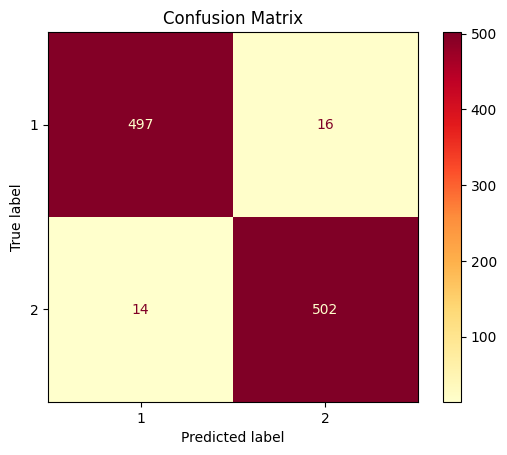

In [7]:
# Plot confusion matrix
cm = confusion_matrix(italy_test_labels, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rotation.classes_)
disp.plot(cmap="YlOrRd")
plt.title("Confusion Matrix")
plt.show()

#### References:

\[1\] J. J. Rodriguez, L. I. Kuncheva and C. J. Alonso, "Rotation Forest: A New Classifier Ensemble Method," in IEEE Transactions on Pattern Analysis and Machine Intelligence, vol. 28, no. 10, pp. 1619-1630, Oct. 2006, doi: 10.1109/TPAMI.2006.211.

\[2\] Bagnall, A., Flynn, M., Large, J., Line, J., Bostrom, A., & Cawley, G. (2018). Is rotation forest the best classifier for problems with continuous features? ArXiv. https://arxiv.org/abs/1809.06705